# importando base de dados

In [5]:
import pandas as pd

In [6]:
dados = pd.read_csv('./data/Preços_de_casas.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [ ]:
#Tirando a coluna Id que não é relevante para o preço da casa
dados = dados.drop(columns='Id')

## Correlação

In [21]:
corr = dados.corr()
corr['preco_de_venda'] #Correlaao das colunas com o preco de venda

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

# Gerando grafico Area X Preço

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0, 0.5, 'preco de venda')

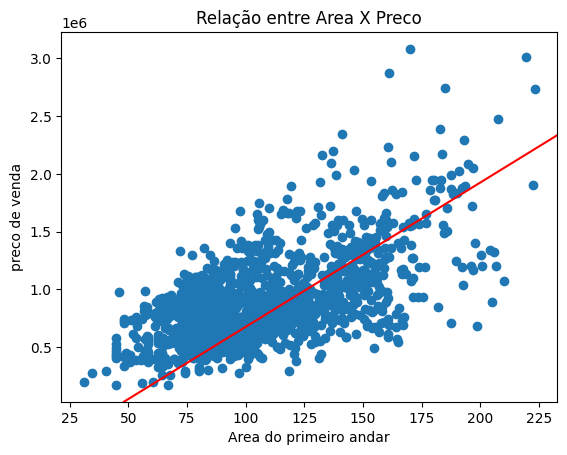

In [10]:
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1=(66, 250000), xy2=(190, 1800000), color='red')
plt.title('Relação entre Area X Preco')
plt.xlabel('Area do primeiro andar')
plt.ylabel('preco de venda')

# Dividindo conjunto de dados em treino e teste

In [11]:
from sklearn.model_selection import train_test_split

In [22]:
y = dados['preco_de_venda'] #Coluna procurada
x = dados.drop(columns='preco_de_venda') #Colunas base

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=156)

In [23]:
#Criando DataFrame de treino com as variaveis da separação
df_train = pd.DataFrame(data=x_train)
df_train['preco_de_venda'] = y_train

In [15]:
from statsmodels.formula.api import ols

# Criando modelo de regressão

In [16]:
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()

In [26]:
modelo_0.params
#Previsão para quando a area do primeiro andar é 0
#Quanto a area do primeiro andas aumenta no preco

Intercept              134993.933169
area_primeiro_andar      7015.644645
dtype: float64

In [27]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     620.4
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          5.23e-107
Time:                        13:56:32   Log-Likelihood:                -14089.
No. Observations:                1006   AIC:                         2.818e+04
Df Residuals:                    1004   BIC:                         2.819e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             1.35e+05   3

In [28]:
#O r² mostra a "porcentagem" da influencia da coluna sobre o resultado
#A coluna area_primeiro_andar influencia em 38% o resultado de preco_de_venda
modelo_0.rsquared

0.3819067783391361

# Residuos/Desvio Padrão

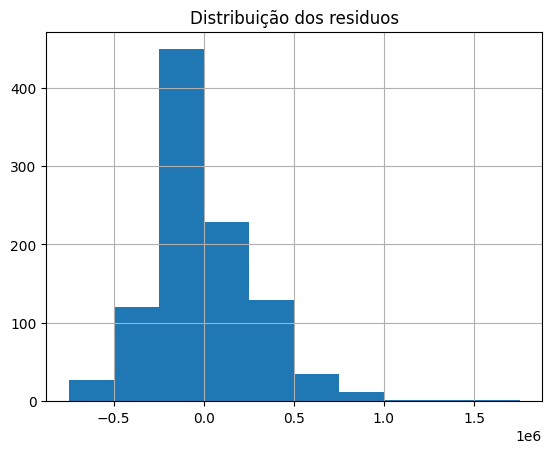

In [29]:
modelo_0.resid.hist()
plt.title("Distribuição dos residuos")
plt.show()

In [30]:
y_predict = modelo_0.predict(x_test)

In [31]:
from sklearn.metrics import r2_score

In [32]:
print(f"R²: {r2_score(y_test, y_predict)}")

R²: 0.37514539323448437
